In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Navigate to the Folder Containing the DEM File
%cd '/content/drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


In [ ]:
# Look for which files are present in the folder
!ls

 DEM_Hillsahde_Aspect_Slope.ipynb   DEM_Virtual_Merged.tif   Sentinel_2_Data.tif   Untitled0.ipynb
 DEM.ipynb			    hylite.ipynb	    'Sentinel 2.ipynb'


In [ ]:
!pip install numpy
!pip install gdal

In [ ]:
import numpy as np
from osgeo import gdal

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Calculate the slope
slope_degrees = np.arctan(np.sqrt(np.power(np.gradient(dem_data, axis=0), 2) + np.power(np.gradient(dem_data, axis=1), 2))) * (180 / np.pi)

# Calculate the aspect
aspect_degrees = np.arctan2(-np.gradient(dem_data, axis=0), np.gradient(dem_data, axis=1)) * (180 / np.pi)

# Adjust aspect values to range from 0 to 360 degrees
aspect_degrees[aspect_degrees < 0] += 360

# Save slope and aspect to new GeoTIFF files
driver = gdal.GetDriverByName("GTiff")

# Create a new dataset for slope
slope_ds = driver.Create("slope.tif", ds.RasterXSize, ds.RasterYSize, 1, gdal.GDT_Float32)
slope_ds.GetRasterBand(1).WriteArray(slope_degrees)
slope_ds.SetProjection(ds.GetProjection())
slope_ds.SetGeoTransform(ds.GetGeoTransform())
slope_ds.FlushCache()

# Create a new dataset for aspect
aspect_ds = driver.Create("aspect.tif", ds.RasterXSize, ds.RasterYSize, 1, gdal.GDT_Float32)
aspect_ds.GetRasterBand(1).WriteArray(aspect_degrees)
aspect_ds.SetProjection(ds.GetProjection())
aspect_ds.SetGeoTransform(ds.GetGeoTransform())
aspect_ds.FlushCache()

# Close the datasets
ds = None
slope_ds = None
aspect_ds = None


In [ ]:
!pip install numpy
!pip install gdal
!pip install matplotlib

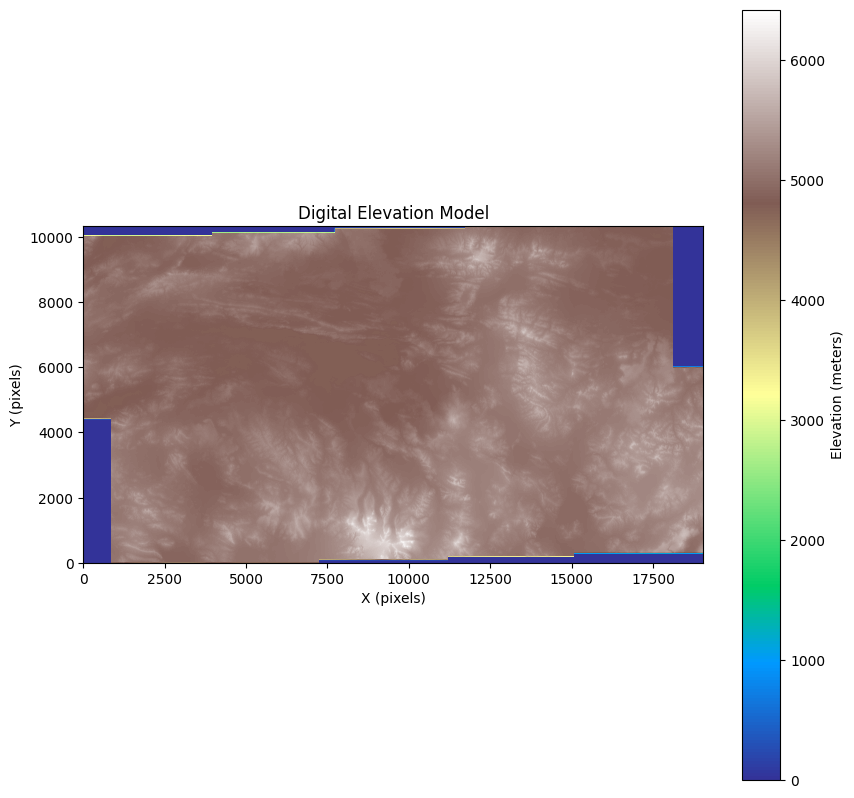

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Create a color map for elevation
cmap = plt.get_cmap("terrain")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the DEM using Matplotlib
im = ax.imshow(dem_data, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))
plt.colorbar(im, ax=ax, label="Elevation (meters)")

# Set axis labels
ax.set_xlabel("X (pixels)")
ax.set_ylabel("Y (pixels)")

# Set a title
ax.set_title("Digital Elevation Model")

# Show the plot
plt.show()

# Close the dataset
ds = None


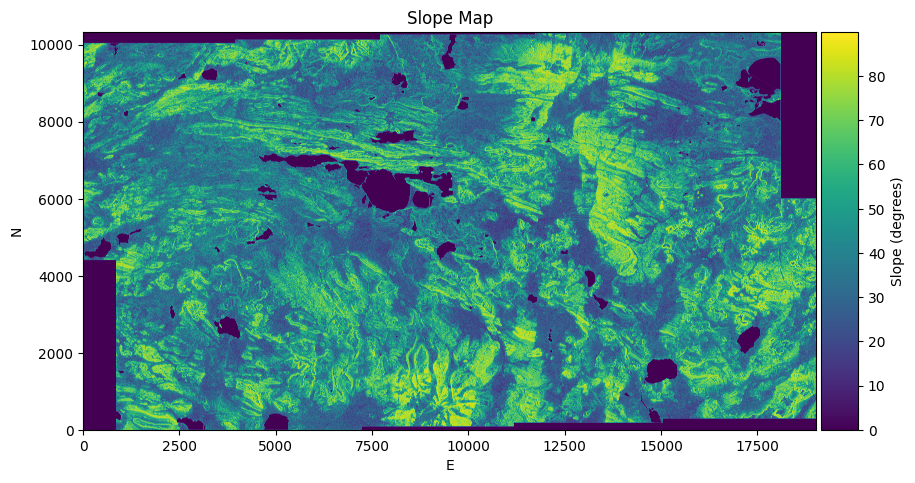

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Calculate the slope using the numpy gradient method
slope_degrees = np.arctan(np.sqrt(np.power(np.gradient(dem_data, axis=0), 2) + np.power(np.gradient(dem_data, axis=1), 2))) * (180 / np.pi)

# Create a color map for the slope
cmap = plt.get_cmap("viridis")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the slope using Matplotlib
im = ax.imshow(slope_degrees, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add a colorbar with adjusted height
cbar = plt.colorbar(im, cax=cax, label="Slope (degrees)")

# Set axis labels
ax.set_xlabel("E")
ax.set_ylabel("N")

# Set a title
ax.set_title("Slope Map")

# Show the plot
plt.show()

# Close the dataset
ds = None


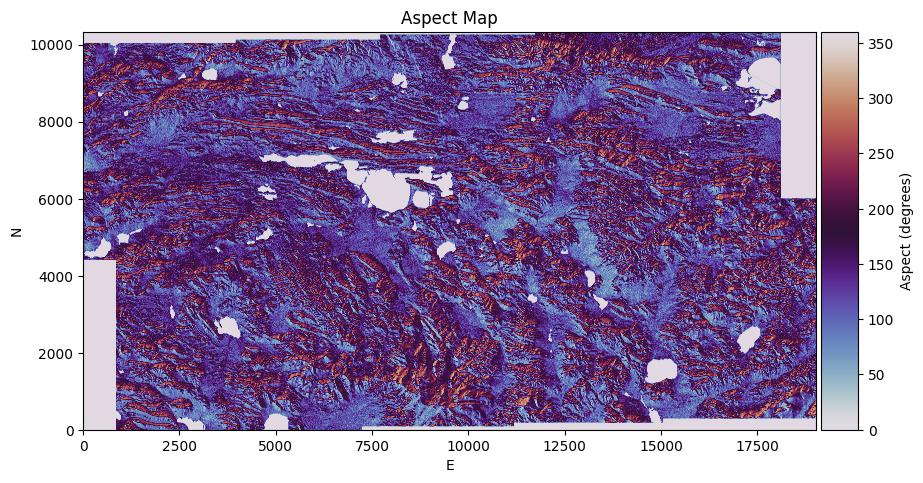

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os  # Import the os module

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Check if the DEM file exists
if not os.path.exists(dem_file):
    print(f"DEM file '{dem_file}' not found.")
else:
    # Open the DEM dataset
    ds = gdal.Open(dem_file)

    if ds is None:
        print(f"Failed to open the DEM file '{dem_file}'.")
    else:
        # Read the DEM data as a NumPy array
        dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

        # Calculate the aspect using the numpy gradient method
        aspect_degrees = np.arctan2(-np.gradient(dem_data, axis=0), np.gradient(dem_data, axis=1)) * (180 / np.pi)

        # Adjust aspect values to range from 0 to 360 degrees
        aspect_degrees[aspect_degrees < 0] += 360

        # Create a color map for the aspect
        cmap = plt.get_cmap("twilight")

        # Create a figure and axis for the plot
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot the aspect using Matplotlib
        im = ax.imshow(aspect_degrees, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))

        # Create a divider for the existing axes instance
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        # Add a colorbar with adjusted height
        cbar = plt.colorbar(im, cax=cax, label="Aspect (degrees)")

        # Set axis labels
        ax.set_xlabel("E")
        ax.set_ylabel("N")

        # Set a title
        ax.set_title("Aspect Map")

        # Show the plot
        plt.show()

        # Close the dataset
        ds = None


In [ ]:
# Read the DEM File: Assuming your DEM file is in a common format like GeoTIFF, you can use libraries like rasterio to read and manipulate the DEM data
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 37.6 MB/s eta 0:00:00


<ipython-input-8-b4cdc13bb2e7>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("RdBu")  # Red for max height, Blue for min height


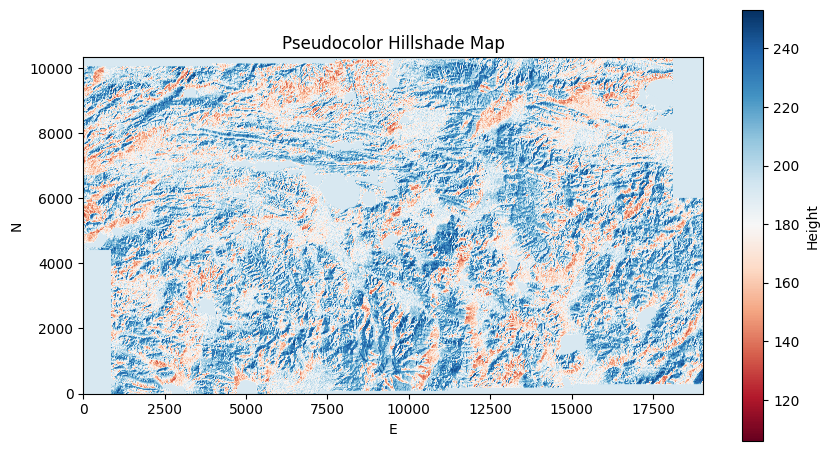

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Calculate the hillshade
def calculate_hillshade(dem, azimuth, altitude):
    # Calculate the slope and aspect using the numpy gradient method
    slope = np.arctan(np.sqrt(np.power(np.gradient(dem, axis=0), 2) + np.power(np.gradient(dem, axis=1), 2)))
    aspect = np.arctan2(-np.gradient(dem, axis=0), np.gradient(dem, axis=1))

    # Calculate the hillshade
    hillshade = np.sin(altitude) * np.sin(slope) + np.cos(altitude) * np.cos(slope) * np.cos(azimuth - aspect)

    # Adjust hillshade values to range from 0 to 255 (8-bit)
    hillshade = ((hillshade + 1) / 2) * 255

    return hillshade

# Set the sun's azimuth (0-360 degrees) and altitude (0-90 degrees)
azimuth_degrees = 315  # Adjust for your specific lighting direction
altitude_degrees = 45  # Adjust for your specific lighting angle

# Convert azimuth and altitude to radians
azimuth = np.radians(azimuth_degrees)
altitude = np.radians(altitude_degrees)

# Calculate the hillshade
hillshade = calculate_hillshade(dem_data, azimuth, altitude)

# Create a custom pseudocolor colormap
cmap = plt.cm.get_cmap("RdBu")  # Red for max height, Blue for min height

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the hillshade with the custom colormap
im = ax.imshow(hillshade, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))
cbar = plt.colorbar(im, ax=ax, label="Height", shrink=0.8)  # Decrease the colorbar height

# Set axis labels
ax.set_xlabel("E")
ax.set_ylabel("N")

# Set a title
ax.set_title("Hillshade Map")

# Show the plot
plt.show()

# Close the dataset
ds = None


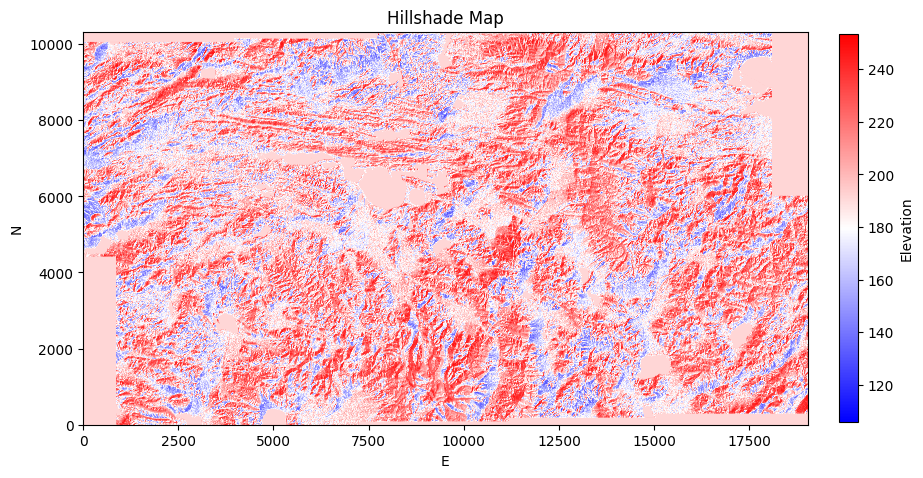

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Calculate the hillshade (same as in your original code)
def calculate_hillshade(dem, azimuth, altitude):
    # Calculate the slope and aspect using the numpy gradient method
    slope = np.arctan(np.sqrt(np.power(np.gradient(dem, axis=0), 2) + np.power(np.gradient(dem, axis=1), 2)))
    aspect = np.arctan2(-np.gradient(dem, axis=0), np.gradient(dem, axis=1))

    # Calculate the hillshade
    hillshade = np.sin(altitude) * np.sin(slope) + np.cos(altitude) * np.cos(slope) * np.cos(azimuth - aspect)

    # Adjust hillshade values to range from 0 to 255 (8-bit)
    hillshade = ((hillshade + 1) / 2) * 255

    return hillshade

# Set the sun's azimuth (0-360 degrees) and altitude (0-90 degrees)

azimuth_degrees = 315  # Adjust for your specific lighting direction
altitude_degrees = 45  # Adjust for your specific lighting angle

azimuth = np.radians(azimuth_degrees)
altitude = np.radians(altitude_degrees)

hillshade = calculate_hillshade(dem_data, azimuth, altitude)

# Create a custom colormap with red for max height and blue for min height
cmap = mcolors.LinearSegmentedColormap.from_list(
    "CustomHillshade", [(0, 'blue'), (0.5, 'white'), (1, 'red')])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the hillshade with the custom colormap
im = ax.imshow(hillshade, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))

# Create a colorbar with decreased height
cbar = plt.colorbar(im, ax=ax, label="Elevation", fraction=0.025, pad=0.04)

# Set axis labels
ax.set_xlabel("E")
ax.set_ylabel("N")

# Set a title
ax.set_title("Hillshade Map")

# Show the plot
plt.show()

# Close the dataset
ds = None


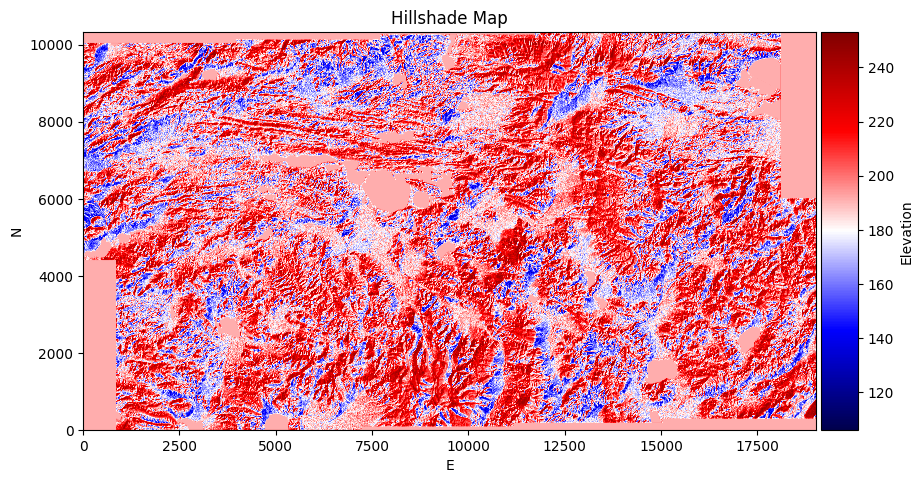

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Calculate the hillshade (same as in your original code)
def calculate_hillshade(dem, azimuth, altitude):
    # Calculate the slope and aspect using the numpy gradient method
    slope = np.arctan(np.sqrt(np.power(np.gradient(dem, axis=0), 2) + np.power(np.gradient(dem, axis=1), 2)))
    aspect = np.arctan2(-np.gradient(dem, axis=0), np.gradient(dem, axis=1))

    # Calculate the hillshade
    hillshade = np.sin(altitude) * np.sin(slope) + np.cos(altitude) * np.cos(slope) * np.cos(azimuth - aspect)

    # Adjust hillshade values to range from 0 to 255 (8-bit)
    hillshade = ((hillshade + 1) / 2) * 255

    return hillshade

# Set the sun's azimuth (0-360 degrees) and altitude (0-90 degrees)
azimuth_degrees = 315  # Adjust for your specific lighting direction
altitude_degrees = 45  # Adjust for your specific lighting angle

azimuth = np.radians(azimuth_degrees)
altitude = np.radians(altitude_degrees)

hillshade = calculate_hillshade(dem_data, azimuth, altitude)

# Create a custom colormap with "seismic" color ramp
cmap = plt.get_cmap("seismic")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the hillshade with the custom colormap
im = ax.imshow(hillshade, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add a colorbar with adjusted height
cbar = plt.colorbar(im, cax=cax, label="Elevation", fraction=0.1)

# Set axis labels
ax.set_xlabel("E")
ax.set_ylabel("N")

# Set a title
ax.set_title("Hillshade Map")

# Show the plot
plt.show()

# Close the dataset
ds = None


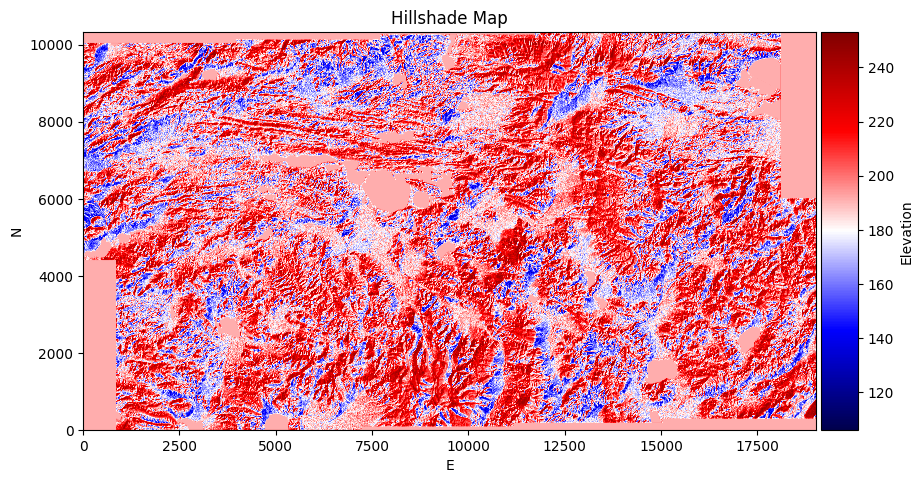

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Calculate the hillshade (same as in your original code)
def calculate_hillshade(dem, azimuth, altitude):
    # Calculate the slope and aspect using the numpy gradient method
    slope = np.arctan(np.sqrt(np.power(np.gradient(dem, axis=0), 2) + np.power(np.gradient(dem, axis=1), 2)))
    aspect = np.arctan2(-np.gradient(dem, axis=0), np.gradient(dem, axis=1))

    # Calculate the hillshade
    hillshade = np.sin(altitude) * np.sin(slope) + np.cos(altitude) * np.cos(slope) * np.cos(azimuth - aspect)

    # Adjust hillshade values to range from 0 to 255 (8-bit)
    hillshade = ((hillshade + 1) / 2) * 255

    return hillshade

# Set the sun's azimuth (0-360 degrees) and altitude (0-90 degrees)
azimuth_degrees = 315  # Adjust for your specific lighting direction
altitude_degrees = 45  # Adjust for your specific lighting angle

azimuth = np.radians(azimuth_degrees)
altitude = np.radians(altitude_degrees)

hillshade = calculate_hillshade(dem_data, azimuth, altitude)

# Create a custom colormap with "seismic" color ramp
cmap = plt.get_cmap("seismic")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Plot the hillshade with the custom colormap
im = ax.imshow(hillshade, cmap=cmap, extent=(0, ds.RasterXSize, 0, ds.RasterYSize))

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add a colorbar with adjusted height
cbar = plt.colorbar(im, cax=cax, label="Elevation", fraction=0.1)

# Set axis labels
ax.set_xlabel("E")
ax.set_ylabel("N")

# Set a title
ax.set_title("Hillshade Map")

# Show the plot
plt.show()

# Close the dataset
ds = None


In [ ]:
# This code includes error handling to check if the file exists and whether the dataset was successfully opened. If there are issues,
# it will print relevant error messages to help you diagnose the problem.

import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import os

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Check if the DEM file exists
if not os.path.exists(dem_file):
    print(f"DEM file '{dem_file}' not found.")
else:
    # Open the DEM dataset
    ds = gdal.Open(dem_file)

    if ds is None:
        print(f"Failed to open the DEM file '{dem_file}'.")
    else:
        # Read the DEM data as a NumPy array
        dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

        # Continue with the rest of your code for hillshade calculation and visualization

        # Close the dataset
        ds = None


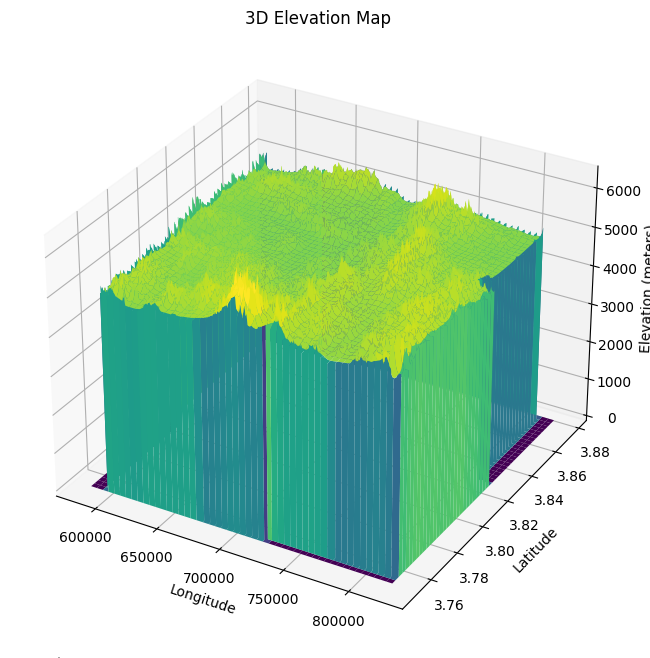

In [ ]:
# Creating a 3D map from a Digital Elevation Model (DEM) file in Python involves using libraries like Matplotlib and mayavi.
# In this example, I'll show you how to create a 3D surface plot of the DEM using Matplotlib

import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Replace with the path to your DEM file
dem_file = "DEM_Virtual_Merged.tif"

# Open the DEM dataset
ds = gdal.Open(dem_file)

# Read the DEM data as a NumPy array
dem_data = np.array(ds.GetRasterBand(1).ReadAsArray())

# Get geotransform information for spatial reference
geotransform = ds.GetGeoTransform()

# Create X and Y coordinate grids based on the DEM dimensions
x = np.arange(geotransform[0], geotransform[0] + geotransform[1] * dem_data.shape[1], geotransform[1])
y = np.arange(geotransform[3], geotransform[3] + geotransform[5] * dem_data.shape[0], geotransform[5])
x, y = np.meshgrid(x, y)

# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.plot_surface(x, y, dem_data, cmap='viridis')

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation (meters)')

# Set a title
ax.set_title('3D Elevation Map')

# Show the plot
plt.show()

# Close the dataset
ds = None

